# Ex 2-1: Logistic Regression (without regularization)

## Load and visualize data

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data1 = np.loadtxt('data/ex2data1.txt',delimiter=',')

In [9]:
X = data1[:,:2]
y = data1[:,2]
m,n = X.shape

In [10]:
pos = (y==1)
neg = (y==0)

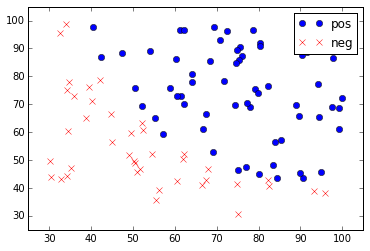

In [12]:
plt.plot(X[pos,0],X[pos,1],'bo')
plt.plot(X[neg,0],X[neg,1],'rx')
plt.axis([25,105,25,105])
plt.legend(['pos','neg'])

## Cost function and its derivative

In [30]:
def sigmoid(X,theta):
    sigmoid = 1. / (1. + np.exp(-np.dot(X,theta)))
    return sigmoid

In [36]:
def cost(theta,X,y):
    m,n = X.shape
    h = sigmoid(X,theta)
    cost = 1./m * ( - np.dot(y,np.log(h)) - np.dot(1.-y,np.log(1.-h)) )
    return cost

In [37]:
def dcost(theta,X,y):
    m,n = X.shape
    h = sigmoid(X,theta)
    dcost = 1./m * np.dot(h-y,X)
    return dcost

## Mean normalization

In [33]:
def X_norm(X):
    X_norm = (X-X.mean(0))/np.std(X,0)
    return X_norm
Xn = X_norm(X)

# with sklearn
#from sklearn import preprocessing
#Xn = preprocessing.scale(X)

In [38]:
# add intercept term
Xp = np.hstack((np.ones((m,1)),Xn))

In [43]:
theta_ini = np.zeros(3)
cost(theta_ini,Xp,y)  # 0.693

0.69314718055994506

## Optimize the cost function with scipy

In [41]:
from scipy.optimize import minimize,fmin_bfgs,fmin

In [44]:
#fmin_bfgs(cost,theta_ini,args=(Xp,y))
#theta_res = fmin_bfgs(cost,theta_ini,args=(Xp,y))

res = minimize(cost,theta_ini,args=(Xp,y))
theta_res = res.x

In [46]:
cost(theta_res,Xp,y)  # 0.203

0.20349770235075246

In [47]:
theta_res # obtained parameters

array([ 1.71835759,  3.9927481 ,  3.72493614])

## Plot decision boundary

In [48]:
u = np.arange(25,100,0.1)
v = np.arange(25,100,0.1)
uu,vv = np.meshgrid(u,v)
mu,mv = u.size, v.size

In [49]:
X_pre = np.column_stack((uu.ravel(),vv.ravel()))

In [51]:
# mean normalization with sklearn
Xp_norm = np.hstack((np.ones((mu*mv,1)), preprocessing.scale(X_pre)))

In [52]:
z = sigmoid(Xp_norm,theta_res)
z.shape = (mu,mv)

In [53]:
t0_n,t1_n,t2_n = theta_res

In [55]:
x1_m,x2_m = np.mean(X,0)
sig1,sig2 = np.std(X,0)

In [56]:
# transform normalized theta to original one
t0 = t0_n - x1_m/sig1 * t1_n - x2_m/sig2 * t2_n 
t1 = t1_n/sig1
t2 = t2_n/sig2

In [58]:
x1 = np.arange(25.,105.,1.)
x2 = -1./t2 * (t0 + t1*x1)

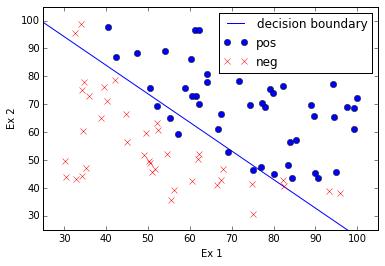

In [62]:
plt.plot(x1,x2)
plt.plot(X[pos,0],X[pos,1],'bo')
plt.plot(X[neg,0],X[neg,1],'rx')
plt.axis([25,105,25,105])
plt.legend(['decision boundary','pos','neg'])
plt.xlabel('Ex 1')
plt.ylabel('Ex 2')